In [2]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np

In [3]:
File1 = "../Clean Default.csv"
Default_info = pd.read_csv(File1)

In [4]:
File3 = "../Clean San Diego.csv"
SD_info = pd.read_csv(File3)
SD_info = SD_info.drop(columns = ["Unnamed: 0","Unnamed: 0.1","Zipcode","Type"],axis = 1)
SD_info = SD_info.convert_objects(convert_numeric=True)
SD_info['San Diego Zip Codes'] = SD_info['San Diego Zip Codes'].astype(np.float64)
SD_info = SD_info.sort_values("Home Value",ascending = True)
SD_info.head(20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,San Diego Zip Codes,Home Value
8,92108.0,403400
12,92113.0,408900
5,92105.0,437600
31,92173.0,451500
29,92139.0,456000
13,92114.0,458600
2,92102.0,464400
30,92154.0,479300
14,92115.0,539600
1,92101.0,582800


In [9]:
#Convert the column Home Value from the LB Dataframe to list
Home_Value = [30000,70000,400000,1000000]

#Create empty list to store values
Total_list= [];
Default_list = [];
Not_Default_list = [];

#Run a for loop to see all Default table that are less than the current House value i  
for i in Home_Value:
    Tabless = Default_info[Default_info["Home Value"] < i]
    #The following are conditions and can be changed for each city
    Tabless = Tabless[Tabless["Years at Job"] <= 2]
    Tabless = Tabless[Tabless["Mortgage Due"] <= 70000]
    Tabless = Tabless[Tabless["Loan Total"] <= 200000]
    Total = Tabless['BAD'].count()
    Default = (Tabless['BAD'] == 1).sum()
    Not_Default = (Tabless['BAD'] == 0).sum()
    Total_list.append(Total)
    Default_list.append(Default)
    Not_Default_list.append(Not_Default)
     

#Making a DataFrame from the list we were able to obtain 
Numbers = pd.Series(Home_Value)
df = pd.DataFrame({"Total Count of Default & Not Default": Total_list, "Sum of Default": Default_list,"Sum of Not Default":Not_Default_list})
df = df.set_index(Numbers)
df = df.drop_duplicates('Sum of Default')

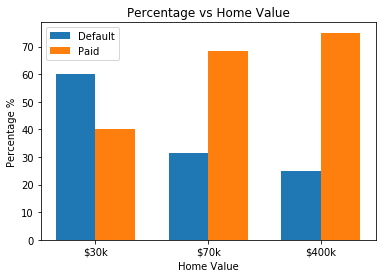

In [11]:
percent_default =(df["Sum of Default"]/df["Total Count of Default & Not Default"]*100).tolist()
percent_not_default = (df["Sum of Not Default"]/df["Total Count of Default & Not Default"]*100).tolist()


ind = np.arange(len(percent_default))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, percent_default, width,label= "Default")
rects2 = ax.bar(ind + width/2, percent_not_default, width, label= "Paid")

ax.set_xlabel('Home Value')
ax.set_ylabel('Percentage %')
ax.set_title('Percentage vs Home Value')
ax.set_xticks(ind)
ax.set_xticklabels(('$30k','$70k','$400k','$1mil'))
ax.legend()
